In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("breast_cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

In [5]:
df["diagnosis"] = df["diagnosis"].map({"B": 0, "M": 1})

In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

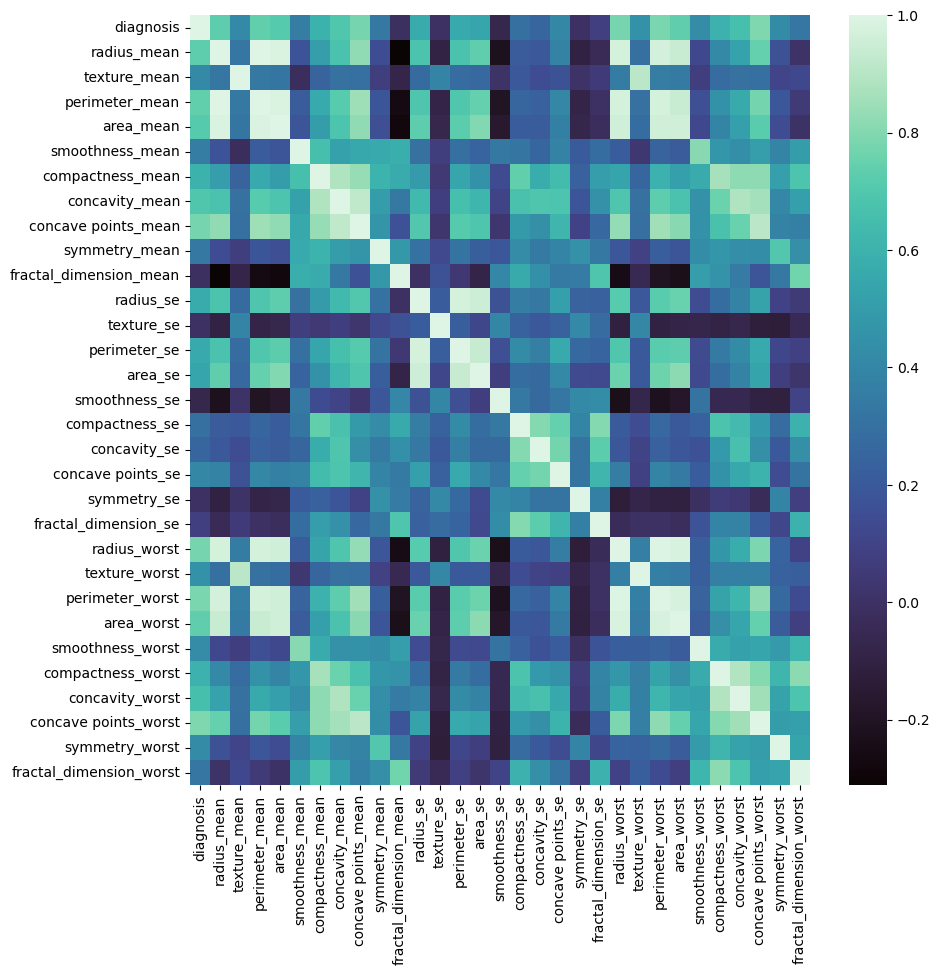

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="mako")

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop("diagnosis", axis = 1)
y = df["diagnosis"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential

In [16]:
X_train.shape

(398, 30)

In [17]:
model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(15, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])

In [18]:
model.fit(x=X_train,
          y=y_train,
         validation_data=(X_test,y_test),
          verbose=1,
          epochs=150
         )

Epoch 1/150


13/13 [==============================] - 5s 65ms/step - loss: 0.6912 - accuracy: 0.5477 - val_loss: 0.6758 - val_accuracy: 0.6257
Epoch 2/150
13/13 [==============================] - 0s 13ms/step - loss: 0.6712 - accuracy: 0.6357 - val_loss: 0.6546 - val_accuracy: 0.6257
Epoch 3/150
13/13 [==============================] - 0s 12ms/step - loss: 0.6511 - accuracy: 0.6759 - val_loss: 0.6294 - val_accuracy: 0.7018
Epoch 4/150
13/13 [==============================] - 0s 12ms/step - loss: 0.6268 - accuracy: 0.7261 - val_loss: 0.6041 - val_accuracy: 0.7485
Epoch 5/150
13/13 [==============================] - 0s 11ms/step - loss: 0.6109 - accuracy: 0.7186 - val_loss: 0.5763 - val_accuracy: 0.8070
Epoch 6/150
13/13 [==============================] - 0s 11ms/step - loss: 0.5825 - accuracy: 0.7588 - val_loss: 0.5464 - val_accuracy: 0.8187
Epoch 7/150
13/13 [==============================] - 0s 10ms/step - loss: 0.5638 - accuracy: 0.7714 - val_loss: 0.5139 - val_accuracy: 0.8713
Epoc

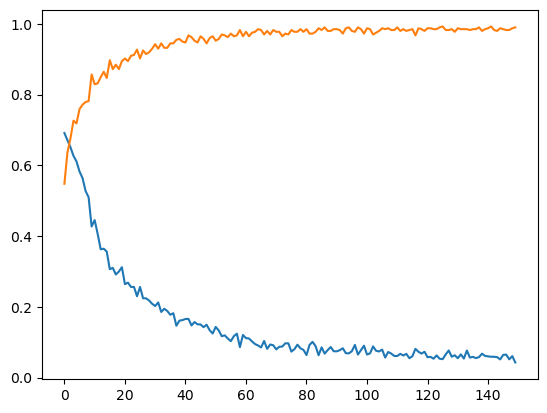

In [19]:
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["accuracy"])

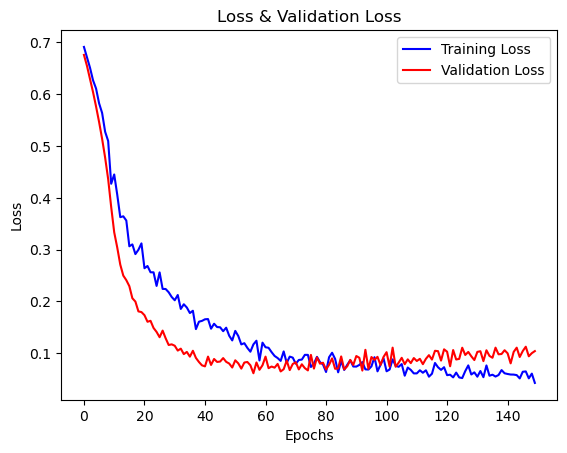

In [27]:
plt.plot(model.history.history["loss"], label='Training Loss', color='blue')
plt.plot(model.history.history["val_loss"], label='Validation Loss', color='red')
plt.title("Loss & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

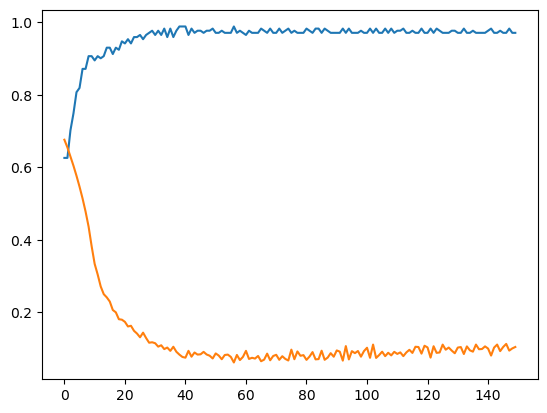

In [28]:
plt.plot(model.history.history["val_accuracy"])
plt.plot(model.history.history["val_loss"])

In [29]:
loss, accuracy = model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.1041 - accuracy: 0.9708
